<a href="https://colab.research.google.com/github/vcautela/Lib_Pandas_Matplot_Plotly/blob/main/Case_2_Varejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

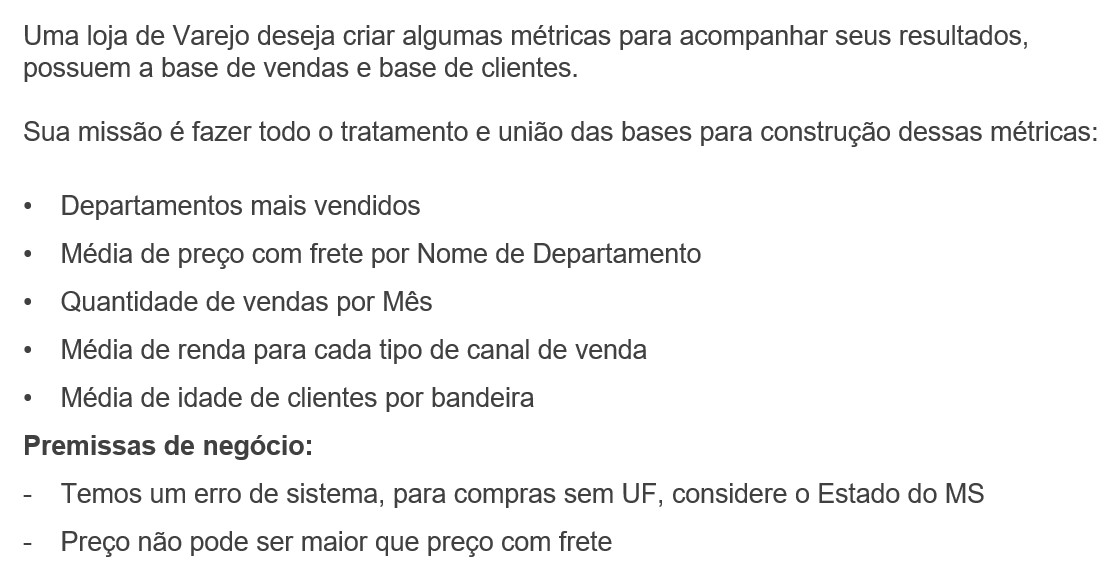

In [1]:
%pip install chart-studio
!pip install -U kaleido

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import chart_studio.plotly as py
import cufflinks as cf
import kaleido as kl

In [3]:
vendas = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Case 2 - Trabalhando com duas bases de dados/varejo.xlsx")
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,0,Aplicativo,B,2023-04-30,74.736,74.736,Beleza e Saude,PR,19106
1,0,Internet,A,2023-04-20,335.920,335.920,Eletroportateis,RS,18110
2,10,Internet,B,2023-02-22,611.280,611.280,Telefones e Celulares,SP,9396
3,10,Aplicativo,B,2023-03-04,127.920,127.920,Beleza e Saude,SP,8399
4,10,Internet,B,2023-02-16,129.528,129.528,Eletroportateis,SP,11556


In [4]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [5]:
vendas.groupby("idcanalvenda").idcompra.nunique()

idcanalvenda
APP             139
Aplicativo    21425
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [6]:
vendas["idcanalvenda"] = vendas["idcanalvenda"].str.replace("APP", "Aplicativo")
vendas.groupby("idcanalvenda").idcompra.nunique()

idcanalvenda
Aplicativo    21539
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [7]:
vendas.groupby("bandeira").idcompra.nunique()

bandeira
A    27679
B    38483
Name: idcompra, dtype: int64

In [8]:
vendas.groupby("Nome_Departamento").idcompra.nunique()

Nome_Departamento
Acessorios e Inovacoes     3548
Alimentos                     2
Ar e Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza e Saude             4626
Brinquedos                 1320
Cama, Mesa e Banho          153
Casa e Construcao           263
Cine e Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte e Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos Musicais         1
Linha Industrial             86
Malas e Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet Shop                     43
Produtos de Limpeza         713
Relogios                    134
TV e Video                    5
TVs e Acessorios           5326
Tablets                    1770
Telefones e Celulares 

In [9]:
vendas["Nome_Departamento"] = vendas["Nome_Departamento"].str.replace(" ", "_")
vendas.groupby("Nome_Departamento").idcompra.nunique()

Nome_Departamento
Acessorios_e_Inovacoes     3548
Alimentos                     2
Ar_e_Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza_e_Saude             4626
Brinquedos                 1320
Cama,_Mesa_e_Banho          153
Casa_e_Construcao           263
Cine_e_Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte_e_Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos_Musicais         1
Linha_Industrial             86
Malas_e_Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet_Shop                     43
Produtos_de_Limpeza         713
Relogios                    134
TV_e_Video                    5
TVs_e_Acessorios           5326
Tablets                    1770
Telefones_e_Celulares 

In [10]:
vendas.groupby("estado").idcompra.nunique()

estado
AC       10
AL      461
AM       15
AP        3
BA     2028
CE     1007
DF     1902
ES     1254
GO     1603
MA      129
MG    10538
MT      510
PA      108
PB      536
PE     1632
PI      247
PR     2754
RJ    16213
RN      463
RO       15
RR        7
RS     4099
SC     1932
SE      340
SP    25962
TO      101
Name: idcompra, dtype: int64

In [11]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [12]:
#filtrando as categorias nulas
vendas[vendas["estado"].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
379,2385,Internet,A,2023-03-21,NaN,207.920,Eletrodomesticos,NaN,18359
470,2880,Aplicativo,A,2023-01-11,NaN,343.840,Eletrodomesticos,NaN,17715
605,3770,Mobile,B,2023-03-09,NaN,125.432,Eletroportateis,NaN,11026
727,4560,Internet,B,2023-04-26,NaN,159.920,Malas_e_Mochilas,NaN,9358
1361,8820,Aplicativo,B,2023-01-30,NaN,2559.200,TVs_e_Acessorios,NaN,1058
...,...,...,...,...,...,...,...,...,...
79399,494975,Aplicativo,A,2023-03-08,NaN,215.912,Eletroportateis,NaN,21235
79666,496635,Mobile,A,2023-02-01,NaN,131.920,Brinquedos,NaN,27739
79710,496895,Aplicativo,B,2023-03-27,NaN,1163.224,Eletrodomesticos,NaN,21858
79885,497855,Internet,B,2023-01-06,NaN,32.800,Acessorios_e_Inovacoes,NaN,3295


In [13]:
# retirando os valores nulos
vendas_sem_nulos = vendas.dropna()
vendas_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79926 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           79926 non-null  int64         
 1   idcanalvenda       79926 non-null  object        
 2   bandeira           79926 non-null  object        
 3   Data               79926 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    79926 non-null  float64       
 6   Nome_Departamento  79926 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        79926 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 6.1+ MB


In [14]:
# Premissa - substituir Nulos na coluna "estado" por "MS"
vendas["estado"] = vendas["estado"].fillna("MS")
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [15]:
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,0,Aplicativo,B,2023-04-30,74.736,74.736,Beleza_e_Saude,PR,19106
1,0,Internet,A,2023-04-20,335.920,335.920,Eletroportateis,RS,18110
2,10,Internet,B,2023-02-22,611.280,611.280,Telefones_e_Celulares,SP,9396
3,10,Aplicativo,B,2023-03-04,127.920,127.920,Beleza_e_Saude,SP,8399
4,10,Internet,B,2023-02-16,129.528,129.528,Eletroportateis,SP,11556


In [16]:
#tratando nulos em Preço
media_preco = vendas["Preço"].mean()
vendas["Preço"].fillna(media_preco, inplace= True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [17]:
media_preco

906.589128543903

In [18]:
vendas[["Preço","Preço_com_frete"]].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [19]:
# Premissa - Preço < Preço_com_frete
preco_errado = vendas.query("Preço > Preço_com_frete")
vendas_correto = vendas.query("Preço < Preço_com_frete")
vendas_correto.describe()

,idcompra,Preço,Preço_com_frete,cliente_Log
count,22047.000000,22047.000000,22047.000000,22047.000000
mean,253799.955550,549.518401,567.332688,13856.313013
std,144794.628563,846.295127,863.458763,8049.120135
min,25.000000,8.720000,9.512000,1.000000
25%,127670.000000,93.528000,100.800000,6858.000000
50%,257885.000000,183.200000,193.912000,13845.000000
75%,379705.000000,661.680000,676.736000,20801.000000
max,499960.000000,14391.200000,14407.120000,27982.000000


In [20]:
vendas_correto.head(3)

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
8,25,Internet,A,2023-04-14,87.92,91.912,Eletroportateis,RS,11987
10,30,Internet,A,2023-01-09,55.20,56.792,Bebes,BA,111
15,70,Aplicativo,B,2023-02-23,719.20,735.120,Audio,AL,26942


In [21]:
vendas_correto.query("Nome_Departamento == 'Esporte_e_Lazer' and estado == 'SP'").describe()

,idcompra,Preço,Preço_com_frete,cliente_Log
count,168.000000,168.000000,168.00000,168.000000
mean,265130.744048,1070.083095,1098.71319,14368.571429
std,140435.252208,617.138494,620.66244,7890.233136
min,2145.000000,10.896000,16.11200,210.000000
25%,157955.000000,527.200000,545.32000,7717.500000
50%,253702.500000,1108.008000,1136.24800,15281.000000
75%,380616.250000,1599.200000,1618.88400,20538.000000
max,496910.000000,2399.200000,2432.74400,27837.000000


In [22]:
vendas_correto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22047 entries, 8 to 80213
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           22047 non-null  int64         
 1   idcanalvenda       22047 non-null  object        
 2   bandeira           22047 non-null  object        
 3   Data               22047 non-null  datetime64[ns]
 4   Preço              22047 non-null  float64       
 5   Preço_com_frete    22047 non-null  float64       
 6   Nome_Departamento  22047 non-null  object        
 7   estado             22047 non-null  object        
 8   cliente_Log        22047 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.7+ MB


In [23]:
#DEPARTAMENTOS MAIS VENDIDOS
vendas_correto.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending=False).reset_index()

,Nome_Departamento,idcompra
0,Bebes,4353
1,Eletrodomesticos,4201
2,Eletroportateis,2223
3,Moveis,2036
4,Utilidades_Domesticas,1366
5,Acessorios_e_Inovacoes,1243
6,Beleza_e_Saude,1054
7,Brinquedos,686
8,Perfumaria,563
9,Produtos_de_Limpeza,522


In [24]:
#MÉDIA DE PREÇOS COM FRETE POR NOME DE DEPARTAMENTO
round(vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(), 2)

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


In [25]:
#QUANTIDADE DE VENDAS POR MÊS
vendas_correto.groupby("Data")["idcompra"].agg("count").sort_values(ascending=False).reset_index()

,Data,idcompra
0,2023-02-13,226
1,2023-01-20,218
2,2023-03-07,215
3,2023-03-30,214
4,2023-02-20,214
...,...,...
114,2023-02-15,162
115,2023-04-04,162
116,2023-02-25,161
117,2023-02-22,156


In [26]:
vendas_correto["Mês"] = vendas_correto["Data"].dt.month
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mês
8,25,Internet,A,2023-04-14,87.92,91.912,Eletroportateis,RS,11987,4
10,30,Internet,A,2023-01-09,55.20,56.792,Bebes,BA,111,1
15,70,Aplicativo,B,2023-02-23,719.20,735.120,Audio,AL,26942,2
20,95,Internet,A,2023-01-29,83.76,85.344,Bebes,SC,8073,1
25,110,Mobile,B,2023-03-12,327.20,343.120,Eletrodomesticos,RS,5815,3


In [27]:
# Quantidade de vendas no mês
vendas_correto.groupby("Mês")["idcompra"].agg("count").sort_values(ascending=False).reset_index()

,Mês,idcompra
0,3,5733
1,4,5590
2,1,5458
3,2,5266


In [28]:
# Quantidade de clientes que compraram no mês
vendas_correto.groupby("Mês").idcompra.nunique().sort_values(ascending=False).reset_index()

,Mês,idcompra
0,3,5590
1,4,5454
2,1,5309
3,2,5138


In [29]:
cliente = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Case 2 - Trabalhando com duas bases de dados/cliente_varejo.xlsx")
cliente.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [30]:
cliente[["idade","renda"]].describe()

,idade,renda
count,26425.000000,26425.000000
mean,53.412564,8241.470350
std,20.698825,3899.871482
min,18.000000,1500.000000
25%,35.000000,4859.000000
50%,53.000000,8234.000000
75%,71.000000,11629.000000
max,89.000000,15000.000000


In [31]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [32]:
cliente = cliente.astype({"renda":"float"})
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [33]:
# left join para unir os df. "vendas_correto" e "cliente"
vendas_cliente = vendas_correto.merge(cliente, how="left", on="cliente_Log")
vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mês,idade,renda
0,25,Internet,A,2023-04-14,87.92,91.912,Eletroportateis,RS,11987,4,19,11907.0
1,30,Internet,A,2023-01-09,55.20,56.792,Bebes,BA,111,1,66,1775.0
2,70,Aplicativo,B,2023-02-23,719.20,735.120,Audio,AL,26942,2,74,3658.0
3,95,Internet,A,2023-01-29,83.76,85.344,Bebes,SC,8073,1,27,11997.0
4,95,Internet,A,2023-01-29,83.76,85.344,Bebes,SC,8073,1,21,7902.0


In [34]:
# média de renda por tipo de canal
agg_idcanal_renda = round(vendas_cliente.groupby("idcanalvenda")["renda"].agg("mean").sort_values(ascending=False).reset_index(), 2)
agg_idcanal_renda

,idcanalvenda,renda
0,Aplicativo,8244.85
1,Mobile,8222.72
2,Internet,8211.84


In [35]:
# média de idade de clientes por bandeira
agg_idade_bandeira = round(vendas_cliente.groupby("bandeira")["idade"].agg("mean").sort_values(ascending=False).reset_index(), 2)
agg_idade_bandeira

,bandeira,idade
0,A,53.30
1,B,53.29


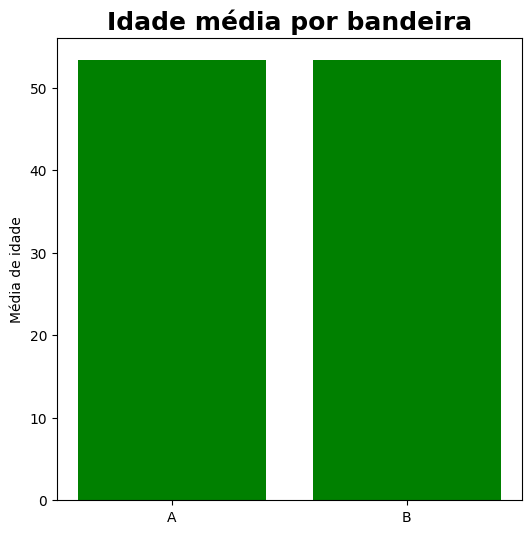

In [36]:
fig = plt.figure(figsize=(6,6))

plt.bar(agg_idade_bandeira["bandeira"], agg_idade_bandeira["idade"], color="green")
plt.ylabel("Média de idade")
plt.title("Idade média por bandeira", loc="center", fontsize=18, fontweight="bold", color="black");

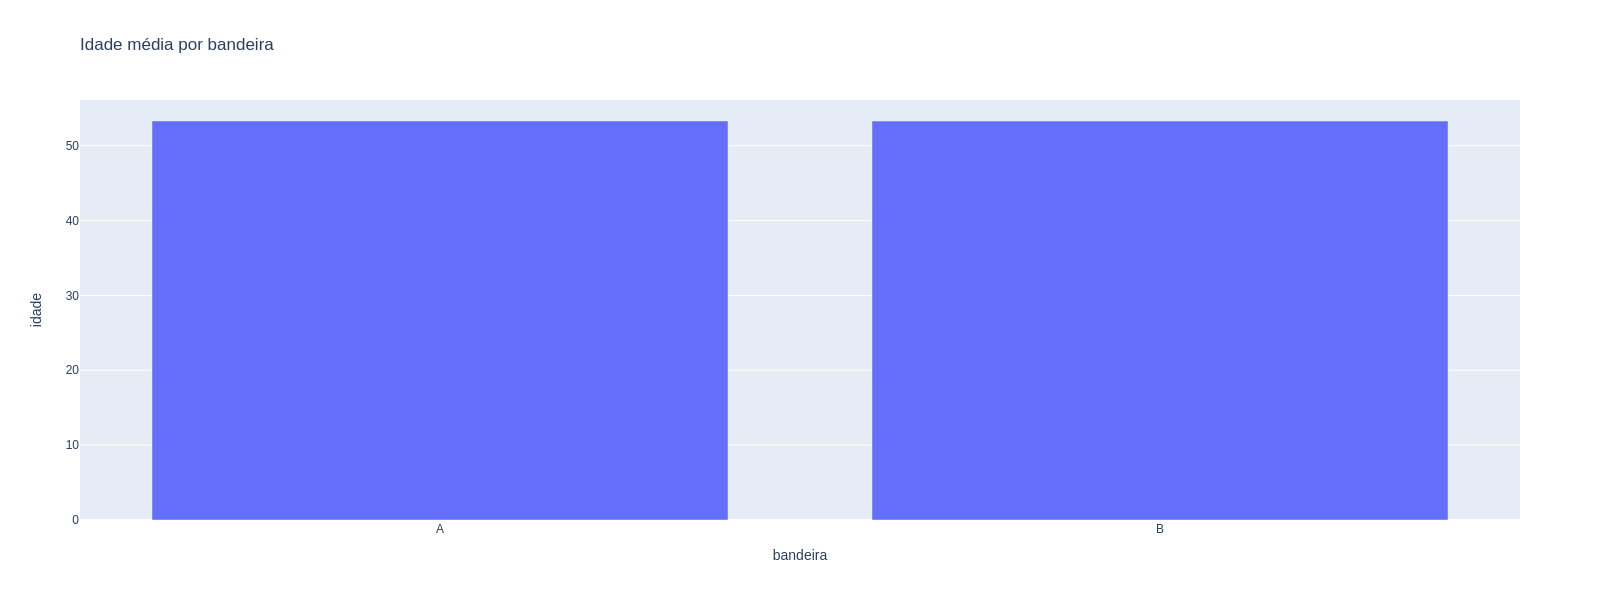

In [63]:
fig = px.bar(agg_idade_bandeira, x = "bandeira", y = "idade", title= "Idade média por bandeira")

fig.show(renderer="png", width=1600, height=600)

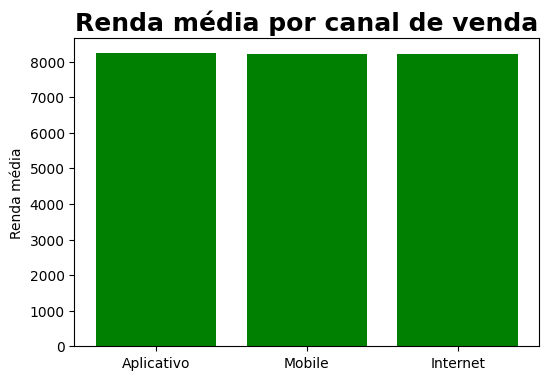

In [38]:
fig = plt.figure(figsize=(6,4))

plt.bar(agg_idcanal_renda["idcanalvenda"], agg_idcanal_renda["renda"], color="green",)
plt.ylabel("Renda média")
plt.title("Renda média por canal de venda", loc="center", fontsize=18, fontweight="bold", color="black");

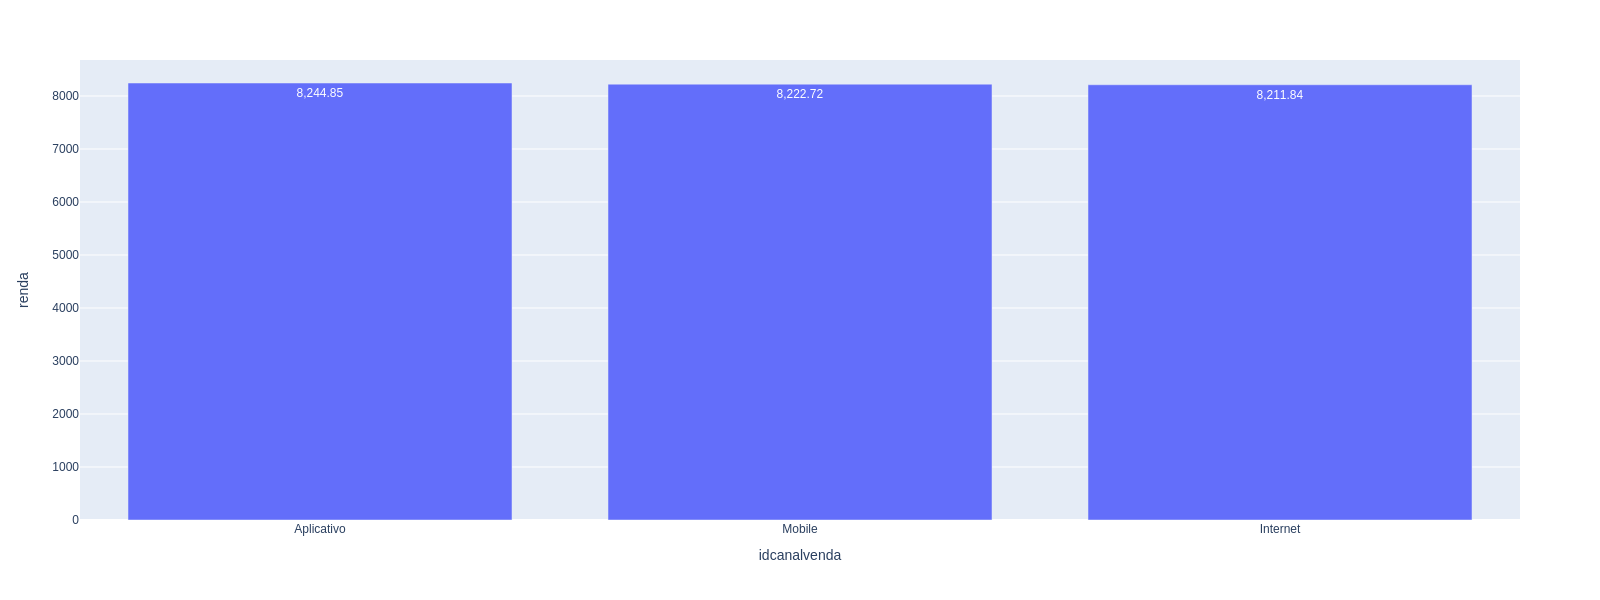

In [64]:
fig = px.bar(agg_idcanal_renda, x = "idcanalvenda", y = "renda", height=500, width=500, text_auto=True)

fig.show(renderer="png", width=1600, height=600)

In [40]:
venda_por_data = vendas_correto.groupby("Data").idcompra.nunique().reset_index()
venda_por_data

,Data,idcompra
0,2023-01-02,193
1,2023-01-03,163
2,2023-01-04,188
3,2023-01-05,204
4,2023-01-06,198
...,...,...
114,2023-04-26,200
115,2023-04-27,212
116,2023-04-28,192
117,2023-04-29,187


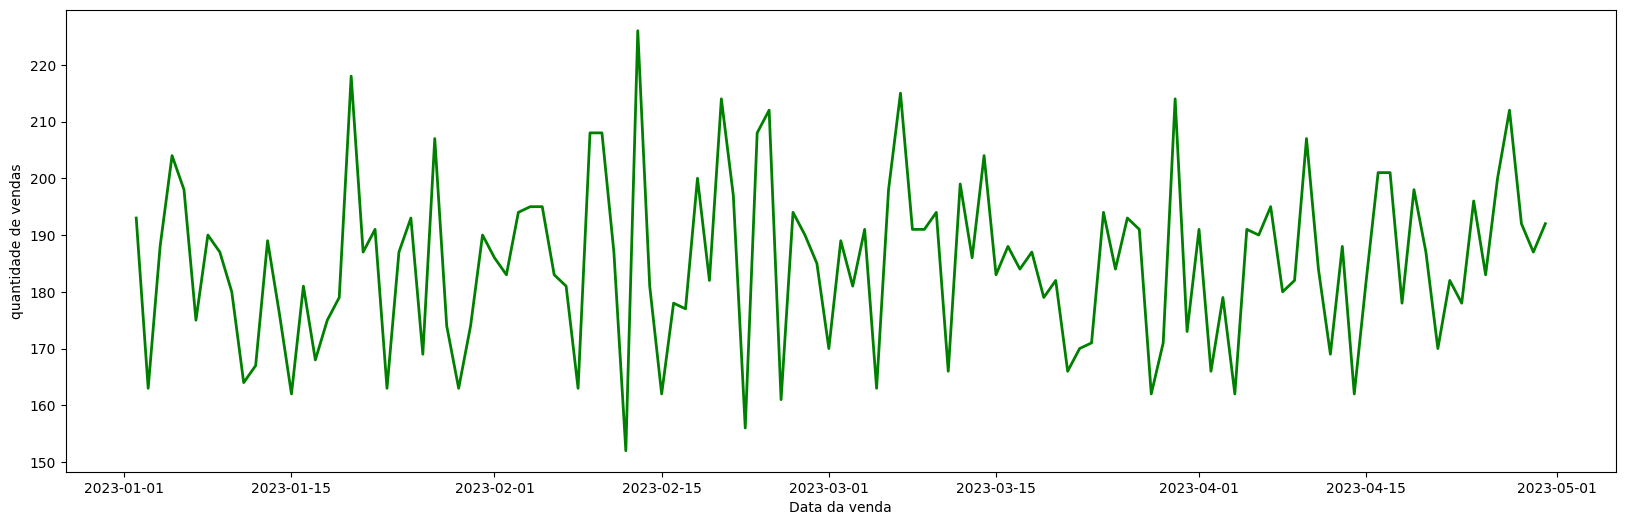

In [41]:
fig = plt.figure(figsize=(20,6))

plt.xlabel("Data da venda")
plt.ylabel("quantidade de vendas")
x = venda_por_data["Data"]
y = venda_por_data["idcompra"]

plt.plot(x, y, color="green", linewidth="2")

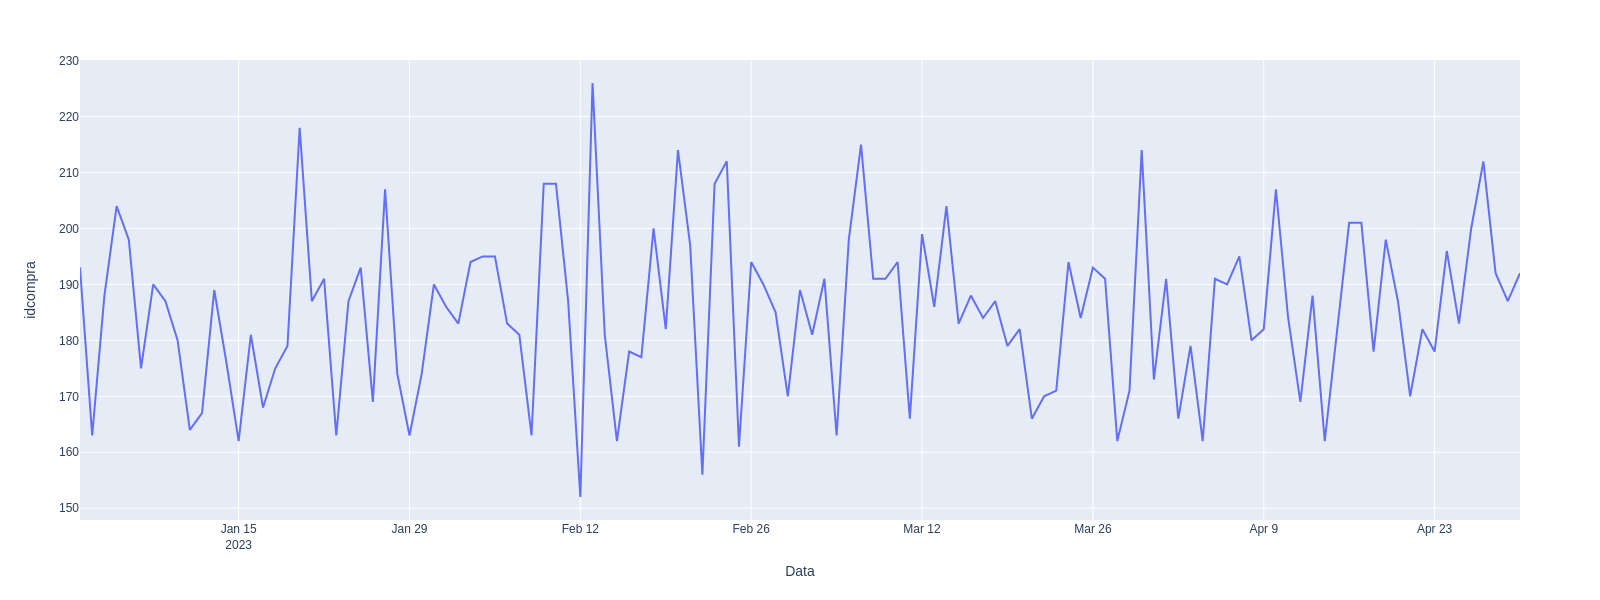

In [60]:
fig = px.line(venda_por_data, x="Data", y="idcompra")

fig.show(renderer="png", width=1600, height=600)

In [44]:
agg_dept_preco = round(vendas_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(), 2)
agg_dept_preco

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


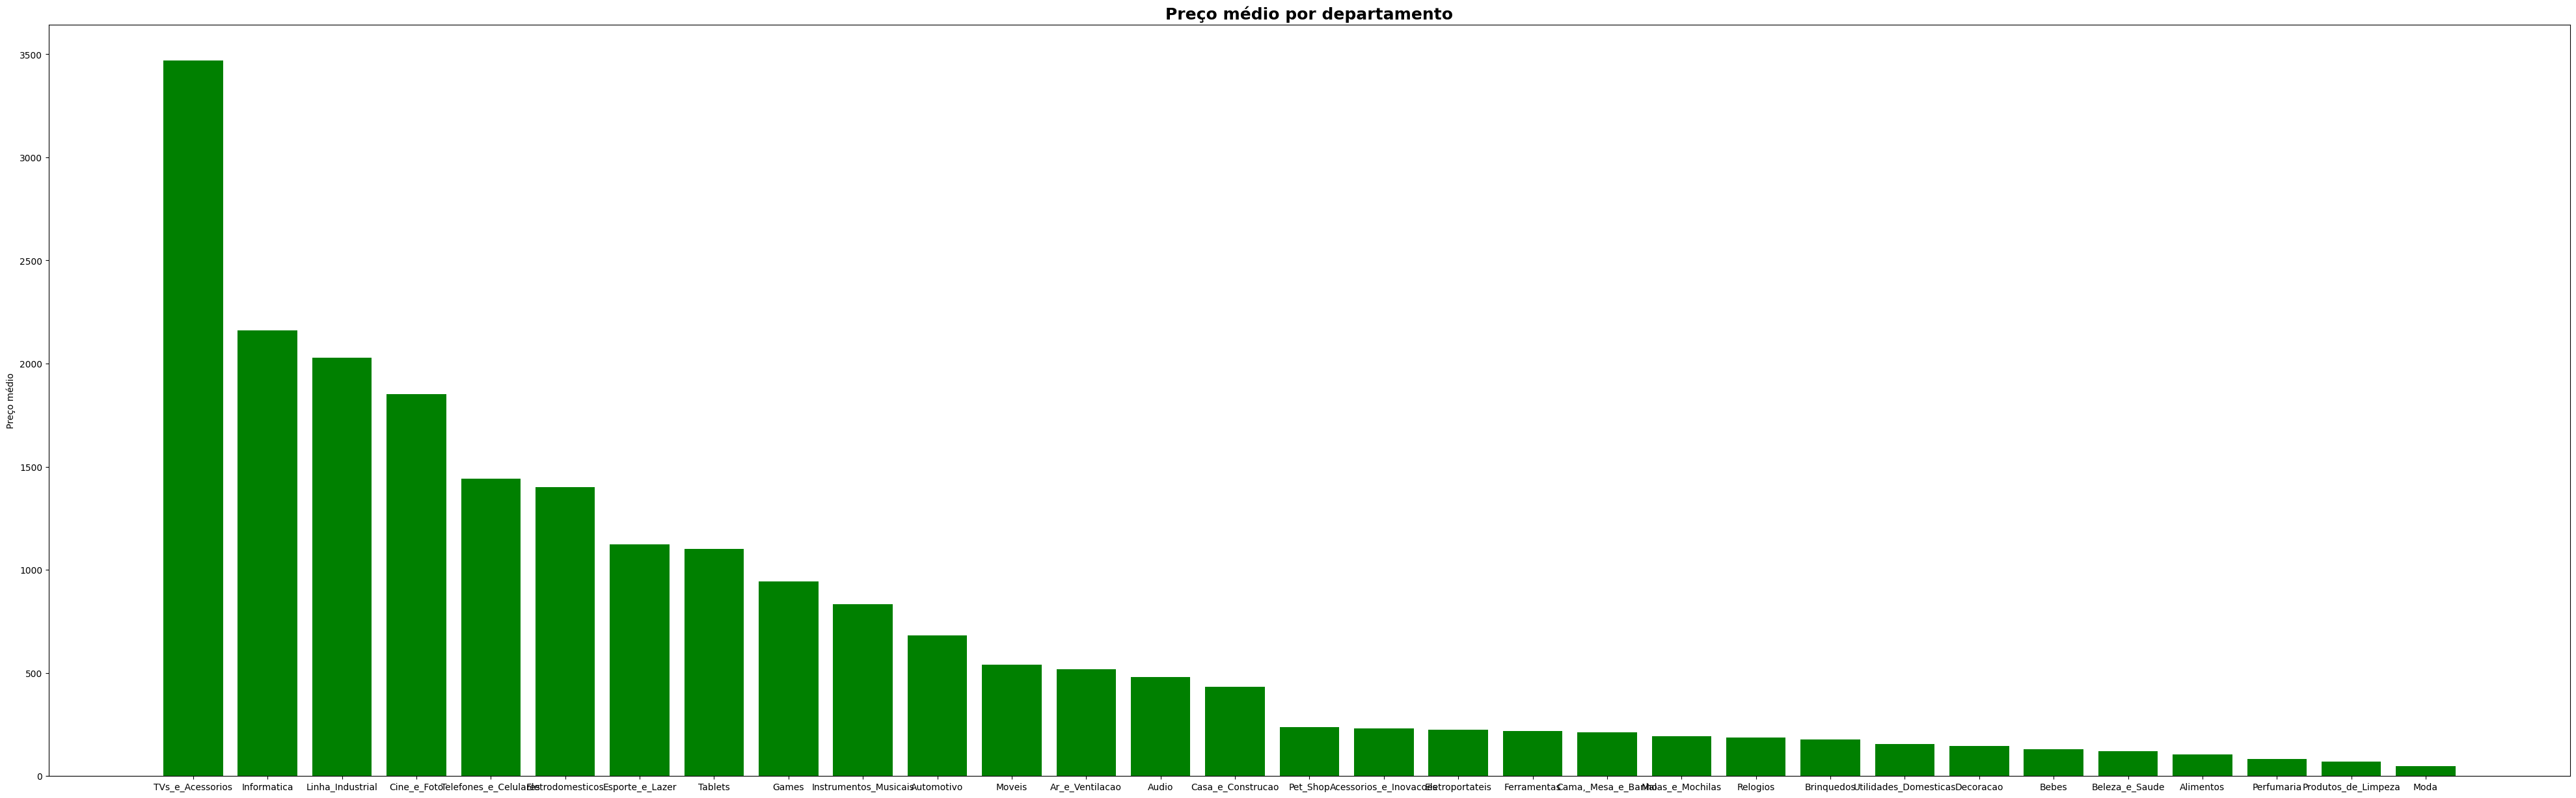

In [45]:
fig = plt.figure(figsize=(50,15))

plt.bar(agg_dept_preco["Nome_Departamento"], agg_dept_preco["Preço_com_frete"], color="green")
plt.ylabel("Preço médio")
plt.title("Preço médio por departamento", loc="center", fontsize=18, fontweight="bold", color="black");

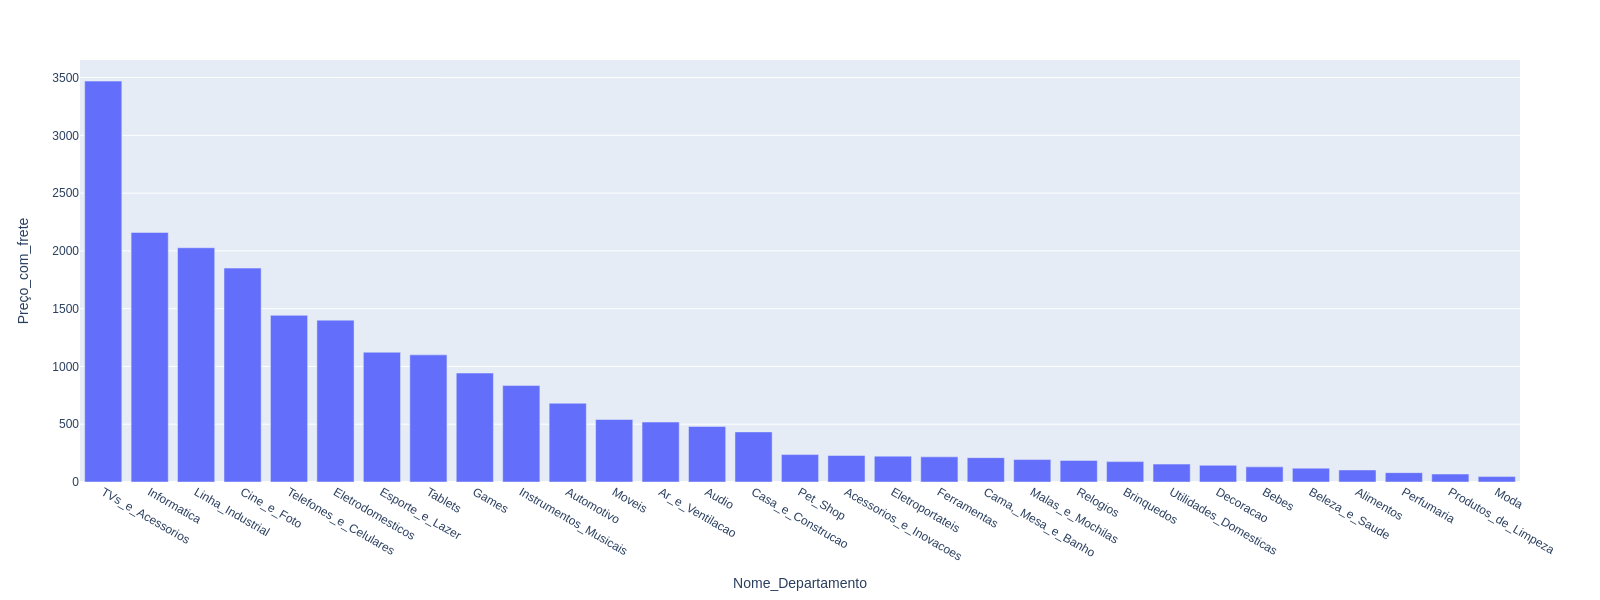

In [65]:
fig = px.bar(agg_dept_preco, x = "Nome_Departamento", y = "Preço_com_frete")

fig.show(renderer="png", width=1600, height=600)